<a href="https://colab.research.google.com/github/AryaPulkit/LSTM-RNN-Model-For-Univariate-Time-Series-Forecasting/blob/master/Univariate_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#kaggle dataset
#https://www.kaggle.com/rakannimer/air-passengers?select=AirPassengers.csv

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
data = pd.read_csv('AirPassengers.csv')
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [0]:
data1 = pd.read_csv('AirPassengers.csv')
data1['Month'] = pd.to_datetime(data1['Month'])
data1.set_index('Month', inplace=True) #set date as index


In [5]:
data.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [13]:
data['Month'] = pd.to_datetime(data['Month'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [0]:
data.set_index('Month', inplace=True) #set date as index


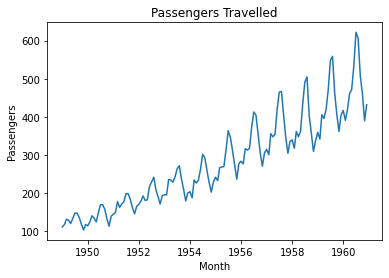

In [23]:
plt.xlabel("Month")
plt.ylabel("Passengers")
plt.title("Passengers Travelled")
plt.plot(data['#Passengers'],)


In [25]:
#data_Scaling
data['#Passengers']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data=scaler.fit_transform(data)

In [35]:
data

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [39]:
data.shape

(144, 1)

In [0]:
#Creating train and test partition
train = int(len(data)*0.75)
test = len(data)-train


In [43]:
train

108

In [44]:
test

36

In [0]:
train_data,test_data=data[0:train,:],data[train:len(data),:1]

In [48]:
train_data

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [49]:
test_data

array([[0.45559846],
       [0.41312741],
       [0.4980695 ],
       [0.47104247],
       [0.5       ],
       [0.63899614],
       [0.74710425],
       [0.77413127],
       [0.57915058],
       [0.49227799],
       [0.3976834 ],
       [0.44980695],
       [0.49420849],
       [0.45945946],
       [0.58301158],
       [0.56370656],
       [0.61003861],
       [0.71042471],
       [0.85714286],
       [0.87837838],
       [0.69305019],
       [0.58494208],
       [0.4980695 ],
       [0.58108108],
       [0.6042471 ],
       [0.55405405],
       [0.60810811],
       [0.68918919],
       [0.71042471],
       [0.83204633],
       [1.        ],
       [0.96911197],
       [0.77992278],
       [0.68918919],
       [0.55212355],
       [0.63320463]])

In [0]:
# converting an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [0]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 4
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [57]:
y_train

array([0.03281853, 0.05984556, 0.08494208, 0.08494208, 0.06177606,
       0.02895753, 0.        , 0.02702703, 0.02123552, 0.04247104,
       0.07142857, 0.05984556, 0.04054054, 0.08687259, 0.12741313,
       0.12741313, 0.1042471 , 0.05598456, 0.01930502, 0.06949807,
       0.07915058, 0.08880309, 0.14285714, 0.11389961, 0.13127413,
       0.14285714, 0.18339768, 0.18339768, 0.15444015, 0.11196911,
       0.08108108, 0.11969112, 0.12934363, 0.14671815, 0.17181467,
       0.14864865, 0.15250965, 0.22007722, 0.24324324, 0.26640927,
       0.2027027 , 0.16795367, 0.13127413, 0.17374517, 0.17760618,
       0.17760618, 0.25482625, 0.25289575, 0.24131274, 0.26833977,
       0.30888031, 0.32432432, 0.25675676, 0.20656371, 0.14671815,
       0.18725869, 0.19305019, 0.16216216, 0.25289575, 0.23745174,
       0.25096525, 0.30888031, 0.38223938, 0.36486486, 0.2992278 ,
       0.24131274, 0.19111969, 0.24131274, 0.26640927, 0.24903475,
       0.31467181, 0.31853282, 0.32046332, 0.40733591, 0.50193

In [62]:
X_train.shape, y_train.shape

((103, 4), (103,))

In [0]:
# reshape input to be [sample, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0], 4, 1)
X_test = X_test.reshape(X_test.shape[0], 4, 1)

In [67]:
X_train.shape

(103, 4, 1)

In [0]:
### Create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [69]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(4,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=1,verbose=1)

Epoch 1/100
103/103 [==============================] - 1s 11ms/step - loss: 0.0198 - val_loss: 0.0549
Epoch 2/100
103/103 [==============================] - 0s 4ms/step - loss: 0.0102 - val_loss: 0.0392
Epoch 3/100
103/103 [==============================] - 0s 4ms/step - loss: 0.0077 - val_loss: 0.0479
Epoch 4/100
103/103 [==============================] - 0s 4ms/step - loss: 0.0080 - val_loss: 0.0558
Epoch 5/100
103/103 [==============================] - 0s 4ms/step - loss: 0.0079 - val_loss: 0.0430
Epoch 6/100
103/103 [==============================] - 0s 4ms/step - loss: 0.0082 - val_loss: 0.0371
Epoch 7/100
103/103 [==============================] - 0s 4ms/step - loss: 0.0075 - val_loss: 0.0355
Epoch 8/100
103/103 [==============================] - 0s 4ms/step - loss: 0.0079 - val_loss: 0.0282
Epoch 9/100
103/103 [==============================] - 0s 4ms/step - loss: 0.0067 - val_loss: 0.0253
Epoch 10/100
103/103 [==============================] - 0s 4ms/step - loss: 0.0066 - val_l

In [0]:
#Model Prediction
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [71]:
test_predict

array([[0.45025972],
       [0.5369119 ],
       [0.72617465],
       [0.7629137 ],
       [0.7101536 ],
       [0.378555  ],
       [0.4919362 ],
       [0.37988245],
       [0.51126057],
       [0.5248228 ],
       [0.4450425 ],
       [0.6742102 ],
       [0.51307094],
       [0.65013444],
       [0.7503642 ],
       [0.89039683],
       [0.72641134],
       [0.45730457],
       [0.5376528 ],
       [0.45940092],
       [0.656635  ],
       [0.5879609 ],
       [0.50985307],
       [0.654879  ],
       [0.71204126],
       [0.6627686 ],
       [0.8811455 ],
       [0.977163  ],
       [0.67068136],
       [0.53069454],
       [0.6068795 ]], dtype=float32)

In [0]:
#Transforming data back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [73]:
test_predict

array([[337.23453],
       [382.1204 ],
       [480.15848],
       [499.1893 ],
       [471.85956],
       [300.0915 ],
       [358.82297],
       [300.7791 ],
       [368.83298],
       [375.85822],
       [334.532  ],
       [453.2409 ],
       [369.77075],
       [440.76965],
       [492.68866],
       [565.2255 ],
       [480.2811 ],
       [340.88376],
       [382.50415],
       [341.96967],
       [444.13693],
       [408.56375],
       [368.1039 ],
       [443.22733],
       [472.83737],
       [447.31415],
       [560.43335],
       [610.1705 ],
       [451.41296],
       [378.89978],
       [418.3636 ]], dtype=float32)

In [74]:
### Calculate RMSE performance metrics
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

256.22266326032883

In [75]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

428.0656943999089

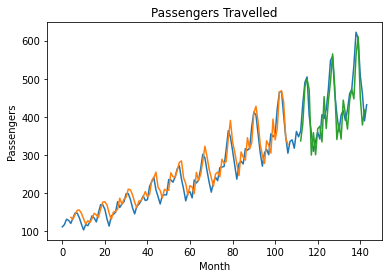

In [104]:
### Plotting 
# shift train predictions for plotting
lookback=4
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data)-1, :] = test_predict
# plot baseline and predictions
plt.xlabel("Month")
plt.ylabel("Passengers")
plt.title("Passengers Travelled")
plt.plot(scaler.inverse_transform(data)) #original data
plt.plot(trainPredictPlot) #train prediction
plt.plot(testPredictPlot) #test prediction
plt.show()